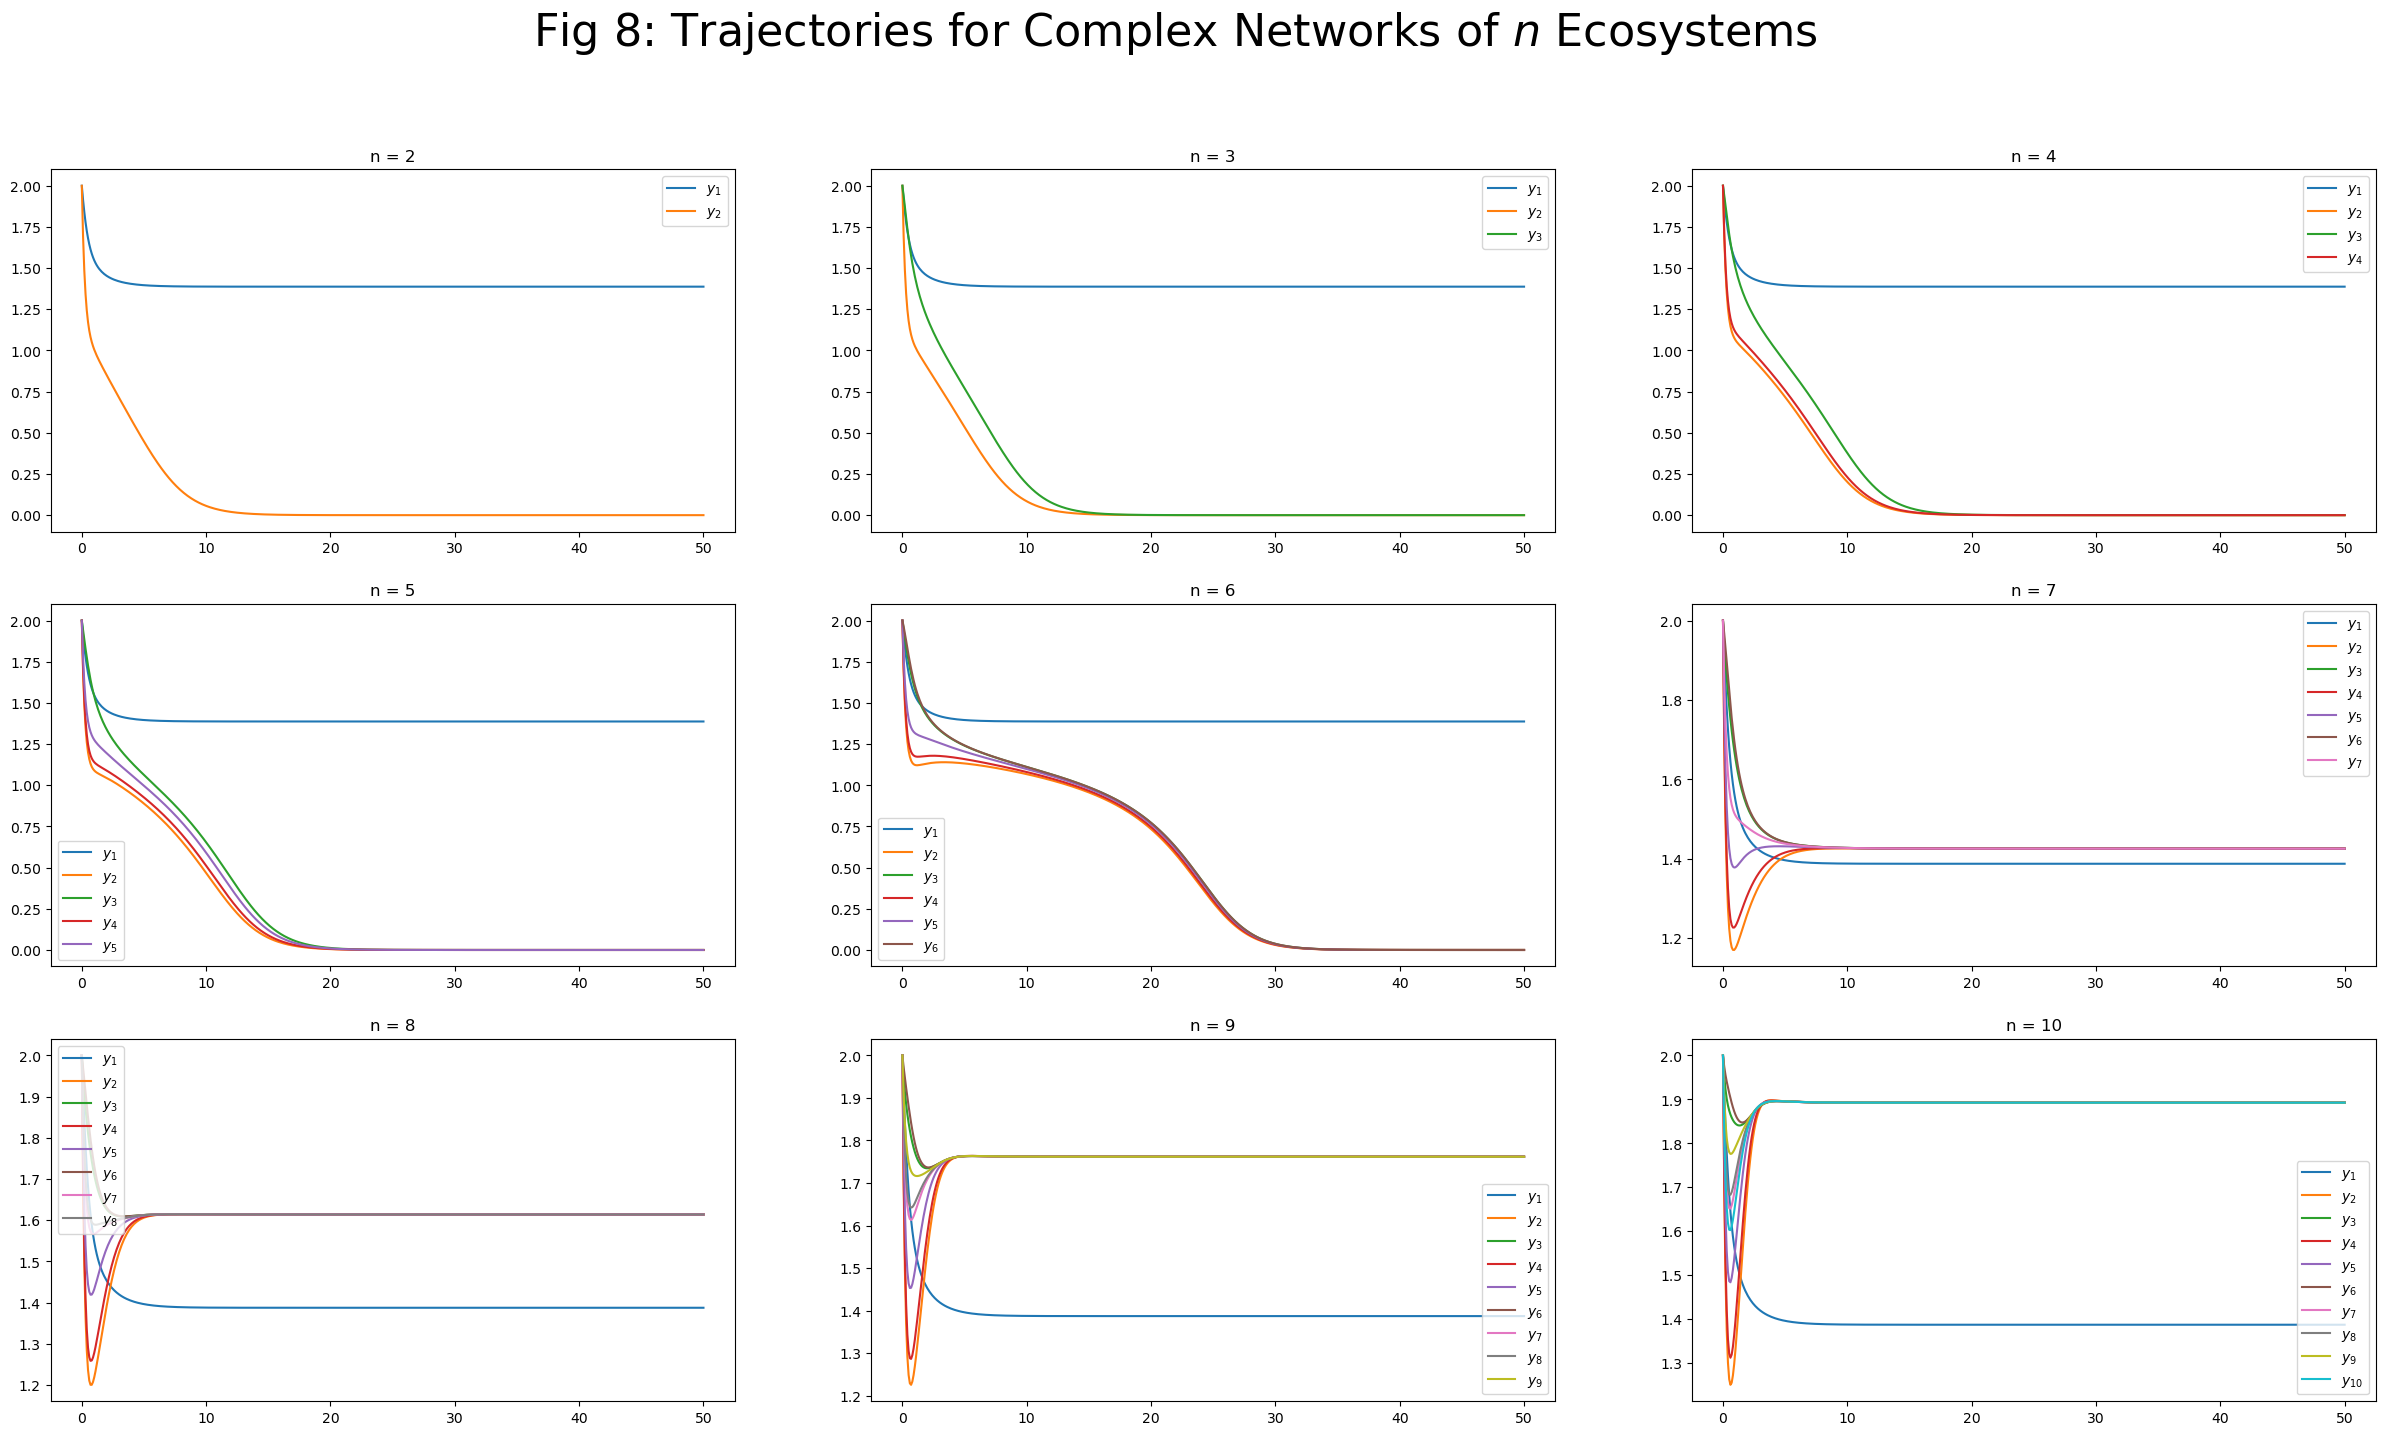

PyObject Text(0.5, 0.98, 'Fig 8: Trajectories for Complex Networks of $n$ Ecosystems')

In [2]:
# Approximately reproduces figure 8 from Cantin2020
# ... random initialization clearly is making the
# difference here, but the general idea
# that systems will go to equilibrium and
# sustain one another is illustrated
using Distributions
using Random
using PyPlot
using DrWatson
using Suppressor
using LaTeXStrings
#@quickactivate :CSSim
include(joinpath(srcdir(), "n_forest.jl"))

# Generate parameters for figure 8
params_container = [
    Dict{Symbol,Any}(
        :ρ  => 4.2, 
        :f  => 1.0,
        :α₀ => -1.0, 
        :w₀ =>  1.0,
        :a₁ => 1.0, 
        :h  => 2.0, 
        :a₂ => 0.0, 
        :d  => repeat([900 / (n-1)], n-1), 
        :l  => 600.0, 
        :P₀ => 1.05, 
        :β₁ => 0.0, 
        :β₂ => 0.15,
        :n  => n,
        :ecosystems_to_deforest => [],
    )
    for n in 2:10
]

# initialize plots
nrows = 3
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,16))
    
# Iterate through the parameters and generate plots
y_density = 2.0
T = 50
x_ix = 1
y_ix = 2
n_states = 2
@suppress_err begin
    for i in 1:nrows
        for j in 1:ncols
            # Get parameters
            flat_ix = (i-1)*ncols + j
            params = params_container[flat_ix]
            
            # Generate initial conditions 
            u0 = fill(y_density, params[:n], n_states)
            u0[:, x_ix] .= 4*rand(MersenneTwister(25), params[:n])
            
            # Compute trajectories
            n_forest_ds = n_forest_system(u0, params)
            S, t = trajectory(n_forest_ds, T)
            S_tensor = reshape(Matrix(S), :, params[:n], n_states)
            
            # iterate through ecosystems and plot trajectories
            for k in 1:params[:n]
                y_k = S_tensor[:, k, y_ix]
                axs[i, j].plot(t, y_k, label=LaTeXString("\$y_{$(k)}\$"))
            end 
            
            axs[i, j].legend()
            axs[i, j].set_title("n = $(params[:n])")
        end
    end 
end 

fig.suptitle(L"Fig 8: Trajectories for Complex Networks of $n$ Ecosystems", fontsize=32)